<a href="https://colab.research.google.com/github/CazabetLyon1/CN_analysis_class/blob/master/CN_class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complex Networks: Graph descriptions

We first import some useful libraries. 
In particular, networkx is a library to manipulate networks

In [0]:
import pandas as pd
import networkx as nx
import statistics
import seaborn as sns
import collections
import numpy as np
import matplotlib.pyplot as plt

We import some datasets. In that case, network of relations between caracters in the Game Of Thrones tv series, season 1 and 7. Comes from: https://networkofthrones.wordpress.com


In [0]:
GOT_S1 = pd.read_csv("https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s1-edges.csv")
GOT_S7 = pd.read_csv("https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s7-edges.csv")
GOT_S1 = GOT_S1.rename(columns={"Source":"source","Target":"target"})
GOT_S7 = GOT_S7.rename(columns={"Source":"source","Target":"target"})

We convert the raw data into graphs, as defined by the networkx library

In [0]:
G_S1 = nx.from_pandas_edgelist(GOT_S1)
G_S7 = nx.from_pandas_edgelist(GOT_S7)

Let's look at the networks visually. Mmmm hard to tell much... Maybe the first one is bigger? We will need to describe them quantitatively!

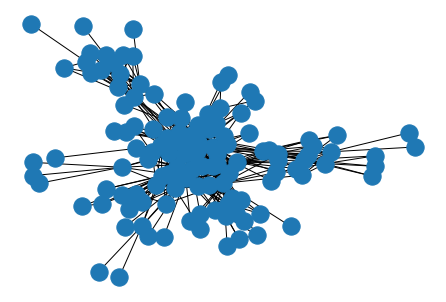

In [73]:
nx.draw( G_S1)

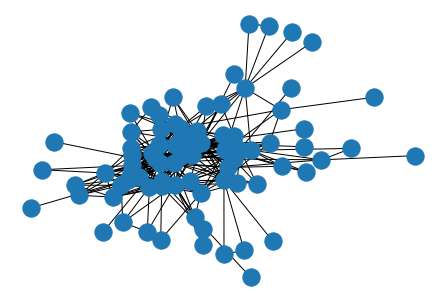

In [74]:
nx.draw(G_S7)

Let's compute the number of nodes and edges, density and average degree of both networks

In [0]:
graph_properties = pd.DataFrame()
graph_properties["Network"]=["S1","S7"]
graph=G_S1
graph_properties["m"]=[G_S1.number_of_nodes(),G_S7.number_of_nodes()]
graph_properties["n"]=[G_S1.number_of_edges(),G_S7.number_of_edges()]
graph_properties["density"]=[nx.density(G_S1),nx.density(G_S7)]
graph_properties["avg_deg"]=[statistics.mean(dict(G_S1.degree()).values()),statistics.mean(dict(G_S7.degree()).values())]

In [63]:
graph_properties

,Network,m,n,density,avg_deg
0,S1,127,550,0.068741,8.661417
1,S7,81,412,0.127160,10.172840


We now add the two flavors of clustering coefficient (note that in networkx, the global clustering coefficient is called "transitivity")

In [65]:
graph_properties["global clust."]=[nx.transitivity(G_S1),nx.transitivity(G_S7)]
graph_properties["avg local clust"]=[nx.average_clustering(G_S1),nx.average_clustering(G_S7)]
graph_properties

,Network,m,n,density,avg_deg,global clust.,avg local clust
0,S1,127,550,0.068741,8.661417,0.381851,0.624582
1,S7,81,412,0.127160,10.172840,0.466936,0.596278


We add the diameter and the average distance

In [66]:
graph_properties["diam."]=[nx.diameter(G_S1),nx.diameter(G_S7)]
graph_properties["avg. dist"]=[nx.average_shortest_path_length(G_S1),nx.average_shortest_path_length(G_S7)]
graph_properties

,Network,m,n,density,avg_deg,global clust.,avg local clust,diam.,avg. dist
0,S1,127,550,0.068741,8.661417,0.381851,0.624582,6,2.647169
1,S7,81,412,0.127160,10.172840,0.466936,0.596278,5,2.372222


Finally, the number of connected components

In [67]:
graph_properties["# Conn. Comp."]=[nx.number_connected_components(G_S1),nx.number_connected_components(G_S7)]
graph_properties

,Network,m,n,density,avg_deg,global clust.,avg local clust,diam.,avg. dist,# Conn. Comp.
0,S1,127,550,0.068741,8.661417,0.381851,0.624582,6,2.647169,1
1,S7,81,412,0.127160,10.172840,0.466936,0.596278,5,2.372222,1


We now plot the distribution of degrees.
Note: we can observe that it is clearly not a normal distribution, that low-degree nodes are by far the most common, and that is some kind of a "long tail", i.e., a few nodes with a very high degree.

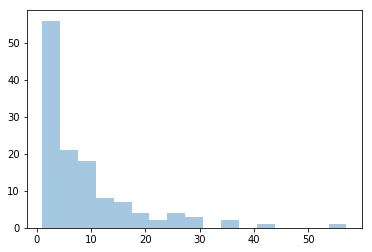

In [50]:
graph=G_S1
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
sns.distplot(degree_sequence, kde=False, rug=False);

Finally, we check visually if the distribution is power-law-ish, i.e. if it looks like a line in a log-log scale. 
2 comments: 

*   if it looks like a line, it is not a conclusion ! Statistical tests need to be use to check if it is indeed a power law, but this is beyond the scope of this course.
*   In the current experiment, the network is so small that the distribution is very noisy, so it is not a line, but we can nevertheless see a kind of apparent linear relation in the log-log plot. Let's not draw a strong conclusion in one directino or another



[ 1  1  1  1  1  1  1  1  3  1  1  1  1  2  2  4  1  3  3  2  3  7  8  8
  7  6  6 15 18 17]


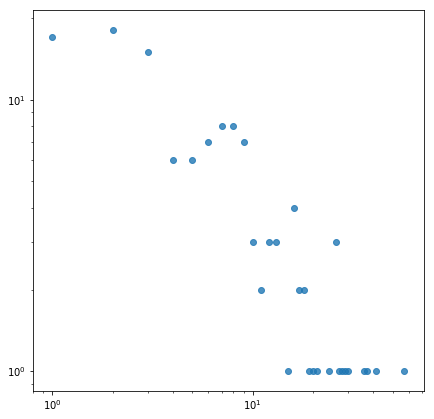

In [68]:
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
deg = np.array(list(deg))
cnt = np.array(list(cnt))
print(cnt)
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot(deg,cnt,fit_reg=False)

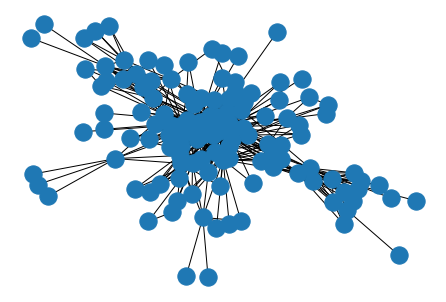

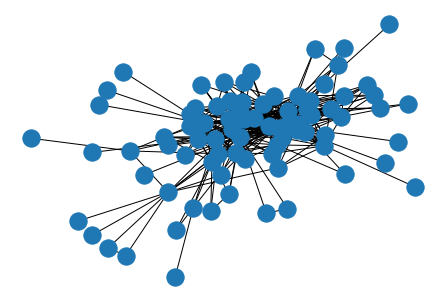

In [72]:
nx.draw( G_S7)